In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('Position_Salaries.csv')
x=data.iloc[:,1].values
y=data.iloc[:,-1].values
x=x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [5]:
#for feature scaling we apply standard scaller and it requires 2d array input
y=y.reshape(-1,1)  #y.reshape(len(y),1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [8]:
#feature scaling
#it is required to do feature scaling on svr model since the higher values may mask the lower ones
#the lower values features might be neglected0
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

In [9]:
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [10]:
x #standardization usually transform between -3 and +3

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [12]:
from sklearn.svm import SVR
model = SVR( kernel = 'rbf')#radial basis function
model.fit(x,y)

C:\Users\pavan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [15]:
sc_y.inverse_transform(model.predict(sc_x.transform([[6.5]])))
#since we built model on feature scaled values

array([170370.0204065])

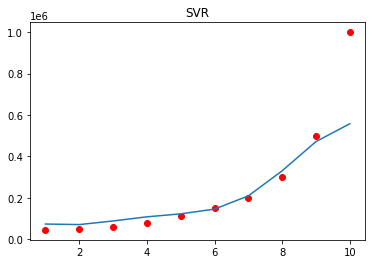

In [26]:
plt.scatter(sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color='red')
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(model.predict(x)))
plt.title('SVR')
plt.show()

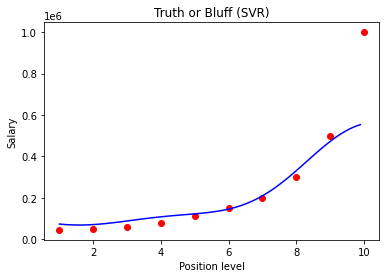

In [27]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(model.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()